In [1]:
%load_ext autoreload
%autoreload 2

# word2vec

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import re
import sys
import pandas as pd
from al_utils.word2vec_utils import Word2VecUtils

sys.path.insert(0, os.getcwd())

/home/.local/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
utils = Word2VecUtils()

utils.set_plt_font()
# df = utils.read_corpus()

<Figure size 1080x720 with 0 Axes>

In [6]:
df = pd.read_json(
    'news/clean-bitext.morp.clean.json.bz2',
    compression='bz2',
    orient='records',
    lines=True,
)

df.fillna('', inplace=True)

df.head()

,type,english,korean,korean_morp,source,document_id,role
0,cnn,The magnetic strength of the headphones varies...,헤드폰의 자기력은 상표와 모델에 따라 차이가 있지만 이번 연구에서 모든 헤드폰 제품...,헤드폰/NNG+의/JKG 자기력/NNG+은/JX 상표/NNG+와/JKB 모델/NNG...,cnn,cnn-10001,train
1,cnn,WASHINGTON (CNN) -- The United States is launc...,미국은 북한 핵 문제 논의를 재개하기 위한 외교적 노력을 시작하고 있다．,미국/NNP+은/JX 북한/NNP 핵/NNG 문제/NNG 논의/NNG+를/JKO 재...,cnn,cnn-10004,train
2,cnn,There are no plans for that delegation to trav...,로버트 우드 미 국무부 부대변인은 5일 “보즈워스 특별대표의 북한 방문 일정은 없다...,로버트/NNP 우드/NNP 미/NNP 국무부/NNG 부대변인/NNG+은/JX 5/S...,cnn,cnn-10006,test
3,cnn,We are looking first and foremost to try to co...,우드 부대변인은 “북한이 협상에 복귀하도록 설득하는 방안을 찾는 것이 최우선”이라며...,우드/NNP 부대변인/NNG+은/JX “/SW+북한/NNP+이/JKS 협상/NNG+...,cnn,cnn-10007,train
4,cnn,The United States hopes to persuade China part...,미국은 특히 중국을 설득해 북한이 핵 프로그램을 폐지하기 위한 6자회담에 복귀하도록...,미국/NNP+은/JX 특히/MAG 중국/NNP+을/JKO 설득/NNG+하/XSV+아...,cnn,cnn-10008,train


In [15]:
df['korean_tok'] = df['korean_morp'].apply(lambda x: re.sub('[ ]+', ' ', re.sub('[/][A-Z]+[+]?', ' ', x)).strip())

df.head()

,type,english,korean,korean_morp,source,document_id,role,korean_tok
0,cnn,The magnetic strength of the headphones varies...,헤드폰의 자기력은 상표와 모델에 따라 차이가 있지만 이번 연구에서 모든 헤드폰 제품...,헤드폰/NNG+의/JKG 자기력/NNG+은/JX 상표/NNG+와/JKB 모델/NNG...,cnn,cnn-10001,train,헤드폰 의 자기력 은 상표 와 모델 에 따르 아 차이 가 있 지만 이번 연구 에서 ...
1,cnn,WASHINGTON (CNN) -- The United States is launc...,미국은 북한 핵 문제 논의를 재개하기 위한 외교적 노력을 시작하고 있다．,미국/NNP+은/JX 북한/NNP 핵/NNG 문제/NNG 논의/NNG+를/JKO 재...,cnn,cnn-10004,train,미국 은 북한 핵 문제 논의 를 재개 하 기 위하 ㄴ 외교적 노력 을 시작 하 고 ...
2,cnn,There are no plans for that delegation to trav...,로버트 우드 미 국무부 부대변인은 5일 “보즈워스 특별대표의 북한 방문 일정은 없다...,로버트/NNP 우드/NNP 미/NNP 국무부/NNG 부대변인/NNG+은/JX 5/S...,cnn,cnn-10006,test,로버트 우드 미 국무부 부대변인 은 5 일 “ 보즈워스 특별 대표 의 북한 방문 일...
3,cnn,We are looking first and foremost to try to co...,우드 부대변인은 “북한이 협상에 복귀하도록 설득하는 방안을 찾는 것이 최우선”이라며...,우드/NNP 부대변인/NNG+은/JX “/SW+북한/NNP+이/JKS 협상/NNG+...,cnn,cnn-10007,train,우드 부대변인 은 “ 북한 이 협상 에 복귀 하 도록 설득 하 는 방안 을 찾 는 ...
4,cnn,The United States hopes to persuade China part...,미국은 특히 중국을 설득해 북한이 핵 프로그램을 폐지하기 위한 6자회담에 복귀하도록...,미국/NNP+은/JX 특히/MAG 중국/NNP+을/JKO 설득/NNG+하/XSV+아...,cnn,cnn-10008,train,미국 은 특히 중국 을 설득 하 아 북한 이 핵 프로그램 을 폐지 하 기 위하 ㄴ ...


In [16]:
from gensim.models import word2vec

In [17]:
sentences = [s.split(' ') for s in df['korean_tok']]

In [18]:
config = {
    'num_features': 300,  # 문자 벡터 차원 수
    'min_word_count': 40,  # 최소 문자 수
    'num_workers': 12,  # 병렬 처리 스레드 수
    'context': 10,  # 문자열 창 크기
    'down_sampling': 1e-3,  # 문자 빈도수 Downsample
}

model = word2vec.Word2Vec(
    sentences,
    size=config['num_features'],
    window=config['context'],
    sample=config['down_sampling'],
    workers=config['num_workers'],
    min_count=config['min_word_count'],
)

In [19]:
model.save('news/clean-bitext.morp.clean.w2v')

In [21]:
model.init_sims(replace=True)

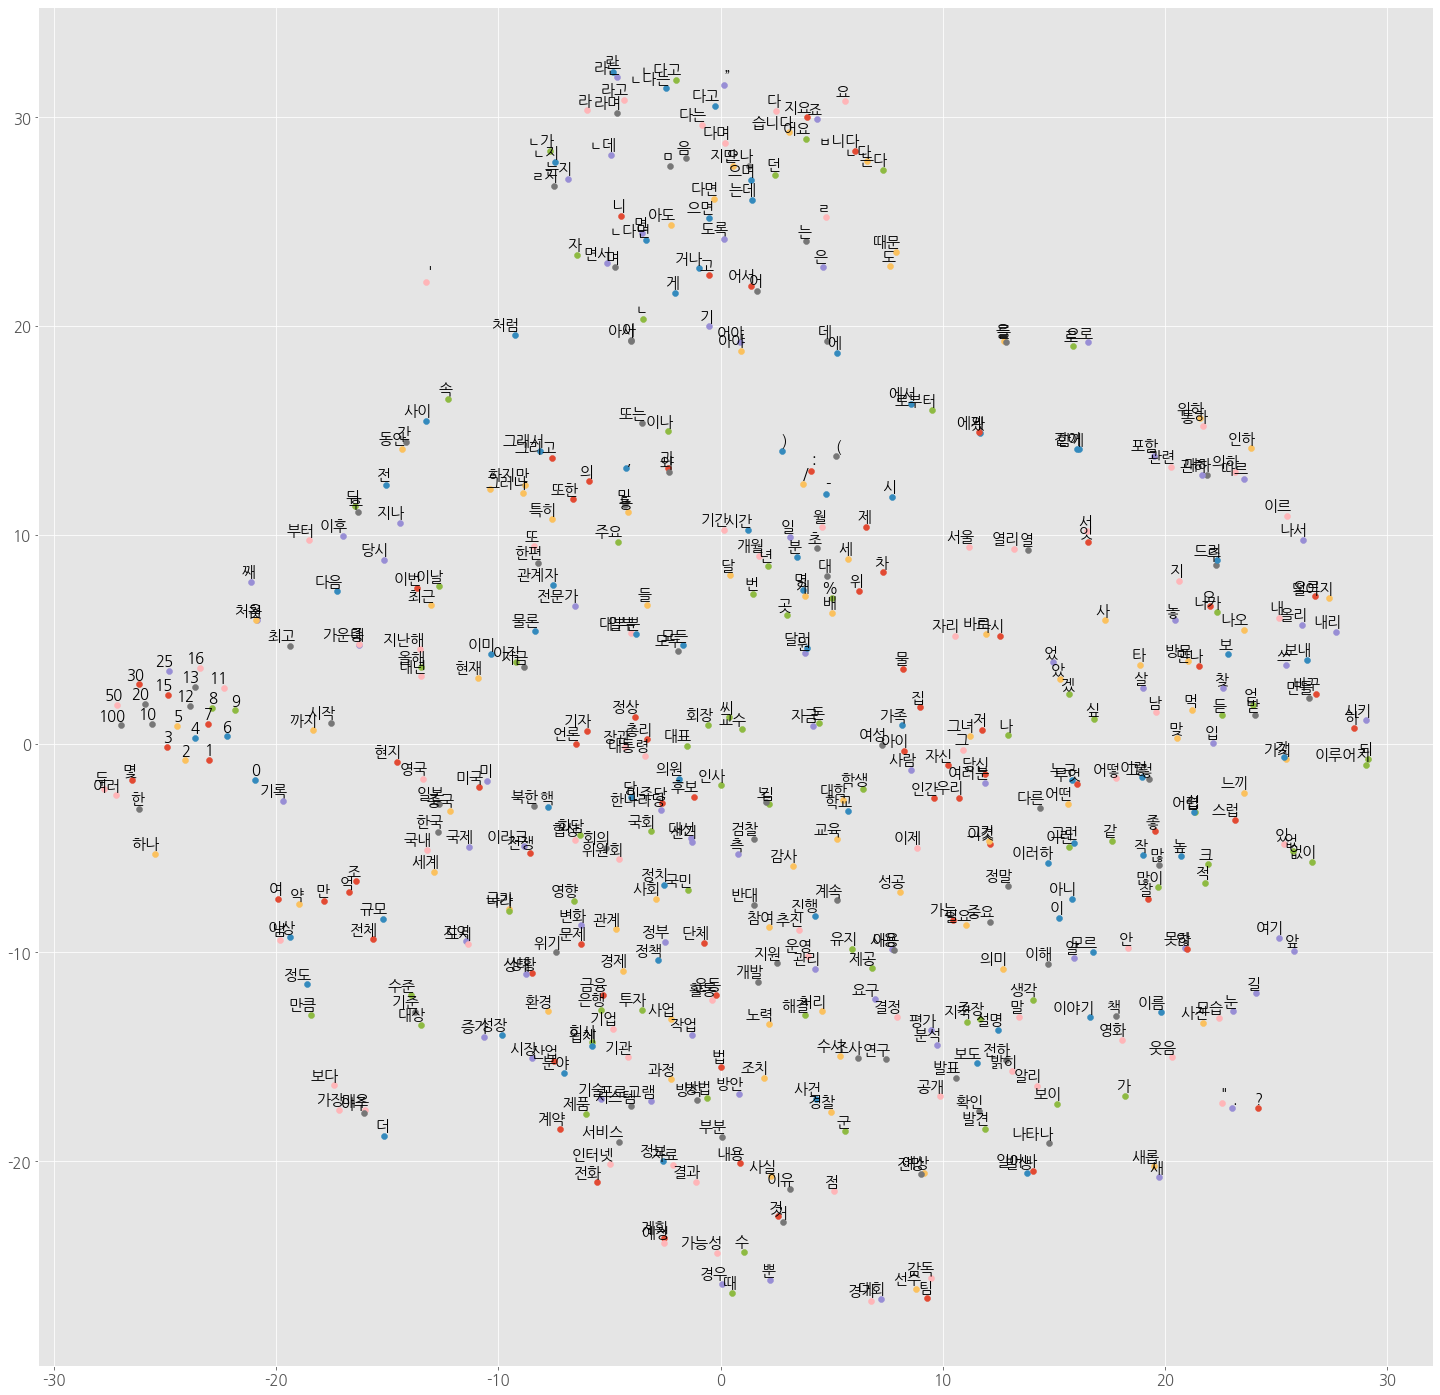

(array([[ 2.84767666e+01,  7.53337681e-01],
        [ 1.52240210e+01, -8.34310532e+00],
        [ 2.29970474e+01, -1.74717274e+01],
        [ 3.85493445e+00,  2.40468788e+01],
        [ 1.27633934e+01,  1.92790108e+01],
        [-3.48226333e+00,  2.03510208e+01],
        [ 2.49556589e+00,  3.02971020e+01],
        [-5.93278360e+00,  1.25547676e+01],
        [ 5.21834326e+00,  1.87231121e+01],
        [ 4.60560083e+00,  2.28275166e+01],
        [ 1.28261213e+01,  1.92515774e+01],
        [ 1.52488928e+01,  3.11392641e+00],
        [ 1.81977272e+01, -1.68731270e+01],
        [ 2.53544827e+01, -4.80534267e+00],
        [-5.18445790e-01,  2.24511929e+01],
        [-4.24328804e+00,  1.31799078e+01],
        [ 1.49606247e+01,  3.90859866e+00],
        [-4.02206135e+00,  1.93288994e+01],
        [-3.32951975e+00,  6.64996195e+00],
        [ 2.91055641e+01, -7.15484440e-01],
        [ 4.74725676e+00,  2.51975002e+01],
        [ 2.56010985e+00, -2.26440105e+01],
        [ 8.57559776e+00,  1.625

In [24]:
utils.show_w2v_tsne(model=model, topn=500)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.style.use('ggplot')

def display_pca_scatterplot(model, words=None, sample=0):
    # https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [word for word in model.wv.vocab]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:, :2]

    plt.figure(figsize=(20, 20))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x, y, word)
        
    return

/home/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


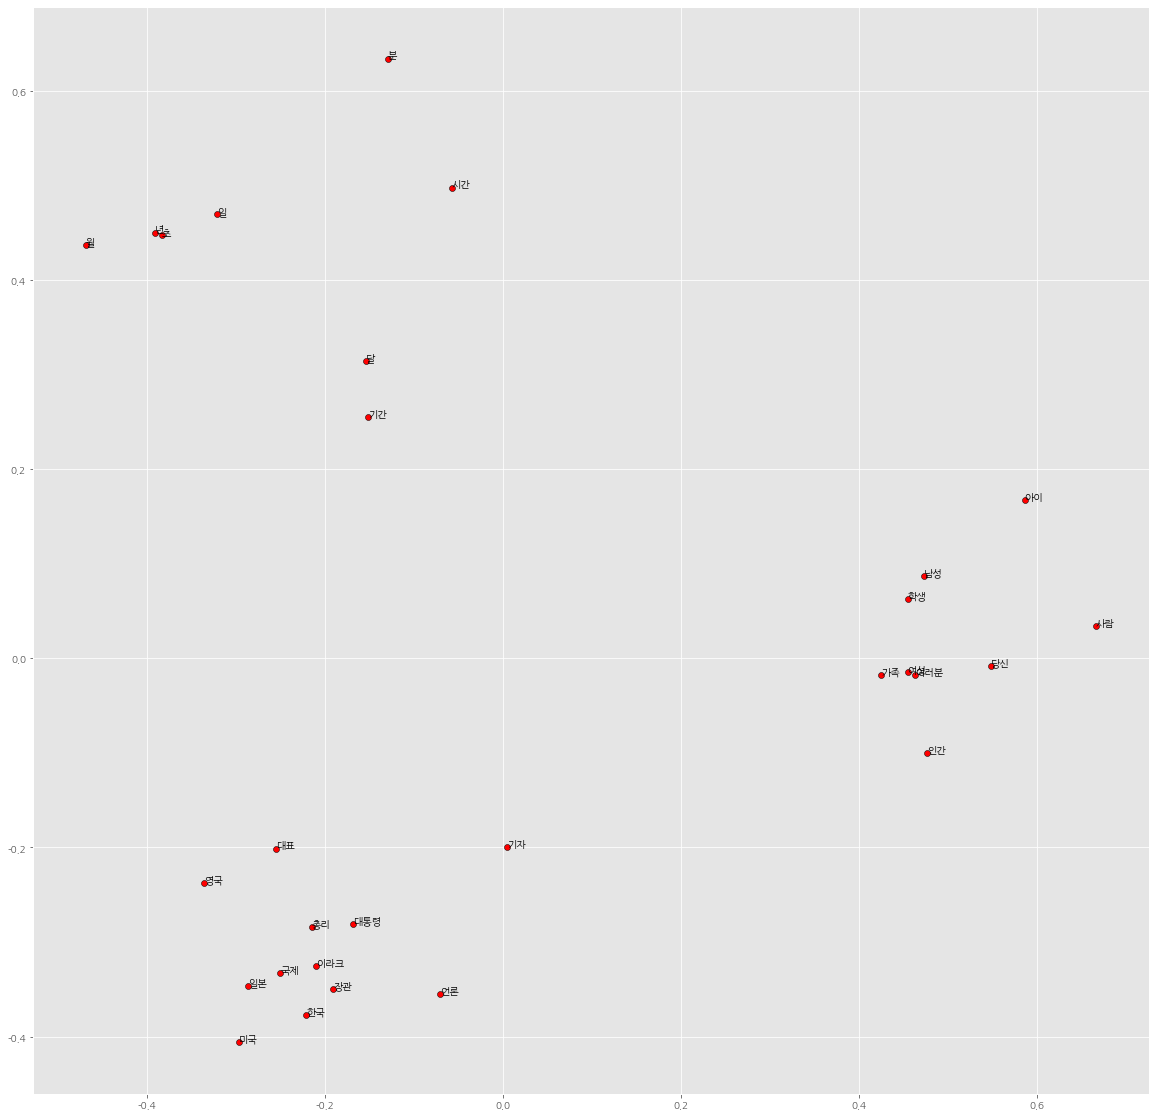

In [53]:
display_pca_scatterplot(
    model, 
    words='이라크 국제 한국 일본 영국 미국 기자 언론 장관 총리 대통령 대표 일 월 분 초 년 달 기간 시간 가족 여성 남성 아이 사람 인간 당신 여러분 학생'.split(' '), 
    sample=100
)

# doc 단위
## 문장 단위
## 게시글 단위: 제목 + 본문

In [ ]:
import re
import gensim

from gensim.models.doc2vec import Doc2Vec
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

In [ ]:
doc_list = utils.get_doc_list(
    df=df,
    column_list='title_morph,contents_morph'.split(','),
    morph_tag_list=['*'],
)

In [ ]:
config = {
    'dbow_words': 1,
    'vector_size': 300,
    'window': 8,
    'min_count': 10,
    'epochs': 100
}

# PV-DBOW + PV-DM w/average
models = [
    Doc2Vec(dm=0, **config),
    Doc2Vec(dm=1, **config),
]

models[0].build_vocab(doc_list)
models[1].reset_from(models[0])

for m in models:
    m.train(
        doc_list,
        total_examples=m.corpus_count,
        epochs=m.epochs,
    )

concated = ConcatenatedDoc2Vec((models[0], models[1]))

utils.save_pickle(
    filename='../data/playground-demo.doc2vec.pkl',
    data={
        'config': config,
        'models': models,
        'concated': concated,
    }
)

In [ ]:
doc_id = 88
query_vec = models[0].infer_vector(doc_list[doc_id].words)

print(' '.join(doc_list[doc_id].words))

for m in models:
    sims = m.docvecs.most_similar([query_vec], topn=2)
    for s in sims:
        print(' '.join(doc_list[s[0]].words), round(s[1], 2))

In [ ]:
inferred_vector = concated.infer_vector(['본던', '이', '어디', '이', 'ㄴ가요'])

# sims = models[0].docvecs.most_similar([inferred_vector], topn=3)
# rank = [docid for docid, sim in sims].index(doc_id)

inferred_vector

In [ ]:
# 클러스터링

In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_clusters = len(set(df['label']))
km = MiniBatchKMeans(
    n_clusters=n_clusters,
    init='k-means++',
    n_init=1,
    init_size=1000,
    batch_size=1000
)

In [ ]:
km.fit(x)

original_space_centroids = svd.inverse_transform(km.cluster_centers_) 

order_centroids = original_space_centroids.argsort()[:, ::-1]

# [The above bit of code is necessary because of our LSI transformation]

terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) 
fig, ax = plt.subplots(figsize=(10, 15)) # set size
ax = dendrogram(linkage_matrix, orientation="right")

# word2vec

In [ ]:
from word2vec_utils import Word2VecUtils

utils = Word2VecUtils()

utils.set_plt_font()

df = utils.read_corpus()
# utils.train_word2vec(df=df, config=self.config)

In [ ]:
df.head()

In [ ]:
# w2v 모델 로딩
model = utils.load_w2v_model(filename='bbs-lineagem.w2v.model')

In [ ]:
tsne_model, tsne_df = utils.show_w2v_tsne(model=model)
tsne_df

In [ ]:
doc_list = utils.get_doc_list(
    df=df, 
    column_list=['title_morph', 'contents_morph'],
    morph_tag_list=['N'],
)    

In [ ]:
utils.save_pickle(
    data=doc_list,
    filename='/home/nlp-platform/backend/' + utils.index + '-noun.pkl'
)

# t-SNE 

In [ ]:
stop_word = ['공성', '캐릭', '오늘', '친목', '추억', '추천', 'ㅋㅋ', '혈맹', '공지']

train_list = [' '.join(tokens) for tokens in utils.remove_stop_words(doc_list=doc_list, stop_word=stop_word)]
tfidf = utils.get_tfidf_vector(doc_list=train_list)

utils.show_tfidf_tsne(
    x=tfidf['space'].toarray().T,
    tfidf_dict=tfidf['dict'],
)

# LDA pyLDAvis

In [ ]:
lda = utils.train_topic_model(doc_list=doc_list[:100])

utils.show_topic_model(
    model=lda['model'],
    corpus=lda['corpus'],
    dictionary_lda=lda['dict'],
)

# 단어 빈도 측정

In [ ]:
counts = utils.get_count(doc_list=doc_list)

top_n = [w for w in counts['vocab'][:10000] if len(w) > 1]
top_n[:10]

In [ ]:
len(counts['vocab'])

# w2v t-SNE 표시

In [ ]:
word_list = ['혈맹', '리니지', '서버', '이벤트', '참여', '게임', '모집', '라인', '시간']
word_list = ['기사', '요정', '군주', '혈맹', '갑옷']

sim = utils.get_w2v_similar_words(word_list=word_list, model=model)

utils.show_w2v_similar_words(
    alpha=0.7,
    labels=word_list,
    word_clusters=sim['word_clusters'],
    embedding_clusters=sim['embedding_2d'],
)

In [ ]:
import pandas as pd

most_similar = []
for c in sim['word_clusters']:
    most_similar.append({
        '단어': c[0],
        '유사어': ', '.join(c[1:])
    })

df = pd.DataFrame(most_similar).set_index('단어')

# 참고 

In [ ]:
# Word2Vec & FastText (이론): https://inspiringpeople.github.io/data%20analysis/word_embedding/
# Google News and Leo Tolstoy: Visualizing Word2Vec Word Embeddings using t-SNE: 
#    https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d